Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [8]:
import logging
import random
from typing import Sequence
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S', level=logging.INFO)

In [9]:
def get_pairs(solution: Sequence):
    seq = solution[:]
    e2 = seq.pop(0)
    seq.append(e2)
    while seq:
        e1 = e2
        e2 = seq.pop(0)
        yield (e1, e2)

In [10]:
NUM_CITIES = 50

GRAPH = nx.DiGraph()
for c in range(NUM_CITIES):
    GRAPH.add_node(c, pos=(random.random(), random.random()))

def evaluate_solution(solution: np.array) -> float:
    total_cost = 0
    for n1, n2 in get_pairs(solution.tolist()):
        n1 = GRAPH.nodes[n1]['pos']
        n2 = GRAPH.nodes[n2]['pos']
        total_cost += (n1[0]-n2[0])**2 + (n1[1]-n2[1])**2
    return round(1_000_000 / (NUM_CITIES+1) * total_cost)

def plot_solution(solution: np.array = None) -> float:
    if solution is not None:
        sol = solution.tolist()
        GRAPH.remove_edges_from(list(GRAPH.edges))
        for n1, n2 in get_pairs(sol):
            GRAPH.add_edge(n1, n2)
    plt.figure(figsize=(15, 5))
    nx.draw(GRAPH, pos=nx.get_node_attributes(GRAPH, 'pos'), with_labels=True, node_color='pink')

In [11]:
def tweak(solution: np.array, *, pm: float = 1/NUM_CITIES) -> np.array:
    new_solution = solution.copy()
    p = None
    while p is None or p < pm:
        i1 = np.random.randint(0, NUM_CITIES)
        i2 = np.random.randint(0, NUM_CITIES)
        temp = new_solution[i1]
        new_solution[i1] = new_solution[i2]
        new_solution[i2] = temp
        p = np.random.random()
    return new_solution

Current cost: 343,293
Current cost: 42,428


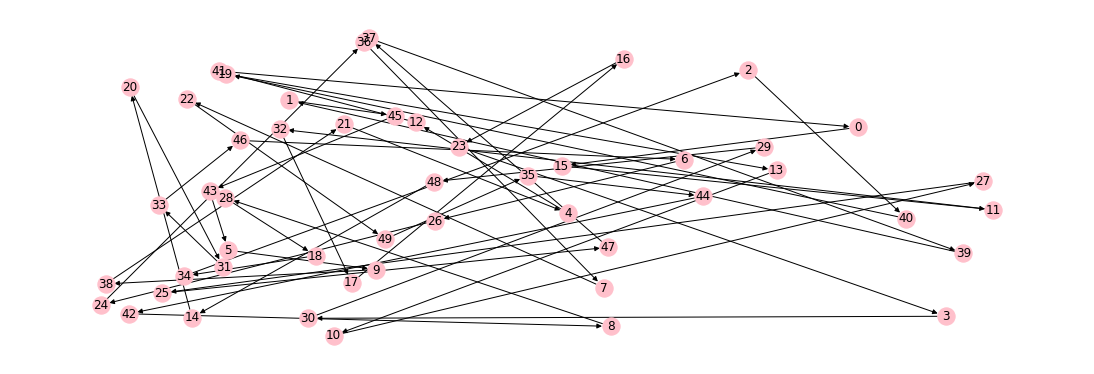

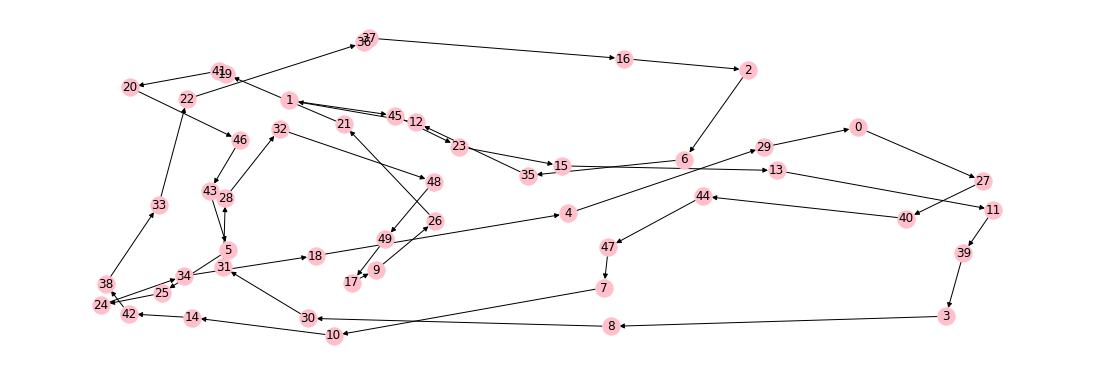

In [12]:
STEADY_STATE = 10_000

solution = np.array(range(NUM_CITIES))
np.random.shuffle(solution)
solution_cost = evaluate_solution(solution)
plot_solution(solution)
print(f"Current cost: {evaluate_solution(solution):,}")

history = [(0, solution_cost)]
steady_state = 0
step = 0
while steady_state < STEADY_STATE:
    step += 1
    steady_state += 1
    new_solution = tweak(solution, pm=.5)
    new_solution_cost = evaluate_solution(new_solution)
    if new_solution_cost < solution_cost:
        solution = new_solution
        solution_cost = new_solution_cost
        history.append((step, solution_cost))
        steady_state = 0
plot_solution(solution)
print(f"Current cost: {evaluate_solution(solution):,}")

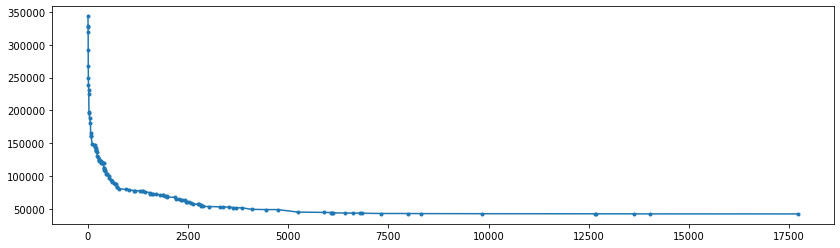

In [14]:
history = np.array(history)
plt.figure(figsize=(14, 4)) 
plt.plot(history[:, 0], history[:, 1], marker='.')